Convert the csv file into data frame, remove unused information and fill the missing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('raw_data.csv')
df.drop(columns=['Commit ID'], inplace=True)
df.drop(columns=['Author Email'], inplace=True)
for col in df.columns:
    for pattern in df[col]:
        if pattern == "N/A" or pattern == '':
            pattern = "unknown"
(df.head())

,Commit message,Contributor,Commit date,Files Changed,Author,Passed all test
0,[R] rename Quality -> Gain (#9938),david-cortes,2023-12-31,"['R-package/R/xgb.model.dt.tree.R', 'R-package...",david-cortes,True
1,[R] Clearer function signatures for S3 methods...,david-cortes,2023-12-31,"['R-package/R/xgb.DMatrix.R', 'R-package/man/g...",david-cortes,True
2,[R] Enable 'dot' dump format (#9930),david-cortes,2023-12-30,"['R-package/R/xgb.dump.R', 'R-package/R/xgb.pl...",david-cortes,True
3,[CI] Update machine images (#9932),hcho3,2023-12-29,"['cmake/modules/FindLibR.cmake', 'doc/contrib/...",Philip Hyunsu Cho,True
4,Fix feature names with special characters. (#9...,trivialfis,2023-12-28,"['src/common/common.h', 'src/tree/tree_model.c...",Jiaming Yuan,True


Some of most used keyword

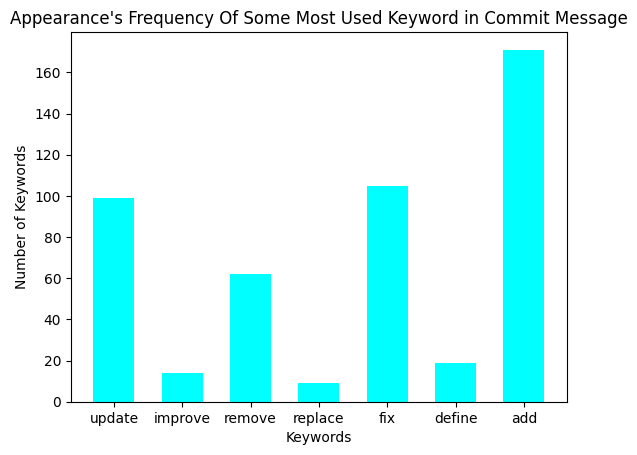

In [2]:
# Create a Series to store the number of keyword.
keyword_count = pd.Series([0, 0, 0, 0, 0, 0, 0], dtype=int)
# Divide main keywords into different groups and count them
keyword_count.index = ['update', 'improve', 'remove', 'replace', 'fix', 'define', 'add']
for c in df['Commit message']:
    if ('update' in c) or ('Update' in c):
        keyword_count['update']+=1
    if (('improve' in c) or ('Improve' in c) or ('optimize' in c) or
        ('Optimize' in c) or ('upgrade' in c) or ('Upgrade' in c)):
        keyword_count['improve']+=1
    if ('disable' in c) or ('Disable' in c) or ('remove' in c) or ('Remove' in c):
        keyword_count['remove']+=1
    if ('replace' in c) or ('Replace' in c):
        keyword_count['replace']+=1
    if ('fix' in c) or ('Fix' in c):
        keyword_count['fix']+=1
    if ('define' in c) or ('Define' in c):
        keyword_count['define']+=1
    if (('add' in c) or ('Add' in c) or ('implement' in c) or ('Implement' in c)
        or ('support' in c) or ('Support' in c)):
        keyword_count['add']+=1
# for key in keyword_count:
#     print(key)
# Visualize the number of each keyword
plt.bar(keyword_count.index, keyword_count, tick_label=keyword_count.index, width=0.6, color=['cyan'])
plt.xlabel('Keywords')
plt.ylabel('Number of Keywords')
plt.title("Appearance's Frequency Of Some Most Used Keyword in Commit Message")
plt.show()

As we can see, the number of commits written to add new feature and characteristic might be the most popular one

Create new DataFrame to store commit through month and the author who made commit.

In [103]:
# Too many things to make comments
df['Commit date'] = pd.to_datetime(df['Commit date'])
commit_month = df['Commit date'].dt.month
count = []
tmp = 1
for i in range(1, commit_month.size):
    if commit_month[i] == commit_month[i-1]:
        tmp+=1
    else:
        count.append(tmp)
        tmp=1
count.append(tmp)
commits_by_month = pd.DataFrame(count, columns=['Commits'])
commits_by_month = commits_by_month[::-1]
commit_through_month = (commit_month.to_frame(name="commit_month"))
commit_through_month["Author"] = df['Author']
commit_through_month = commit_through_month[::-1]
commit_through_month.to_csv('commit_through_month.csv', index=False)
# for i in range(commit_through_month.size() - 1):
#     while commit_through_month['commit_month'][i] == commit_through_month[i+1]:
#         commit_through_month['Author'].value_counts()
commit_through_month

,commit_month,Author
573,1,James Lamb
572,1,dependabot[bot]
571,1,Jiaming Yuan
570,1,Jiaming Yuan
569,1,James Lamb
...,...,...
4,12,Jiaming Yuan
3,12,Philip Hyunsu Cho
2,12,david-cortes
1,12,david-cortes


Number of commits through months


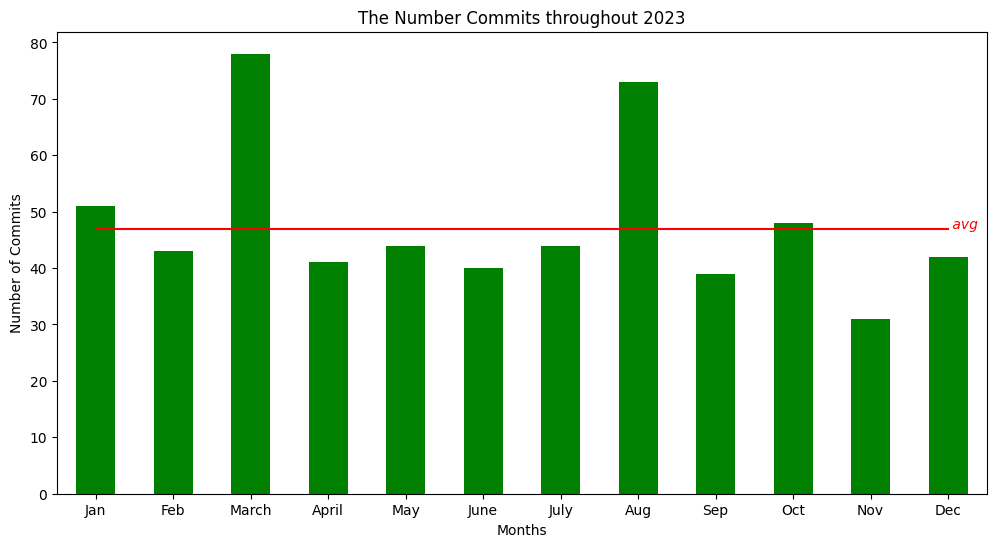

In [111]:
avg_commits_by_month = pd.Series(count)
avg_commits_by_month.index = commits_by_month.index
avg = int(commits_by_month['Commits'].mean())
for i in avg_commits_by_month.index:
    avg_commits_by_month.loc[i] = avg
commits_by_month.index = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
commits_by_month['Commits'].plot.bar(figsize = (12,6) ,color=['green'])
avg_commits_by_month.plot(figsize=(12,6), color='red')
plt.text(11, 47, " avg", size=10, style='italic', color='red')
plt.xlabel('Months')
plt.ylabel('Number of Commits')
plt.title("The Number Commits throughout 2023")
plt.show()

For most of the time, the number of commits is under the average commits of all years. The month with the most commits is March and on the other hand, November have the least commits.

Create frame to store the number of commit that each author made

7 Author that made most of the commits in 2023


count
commit_month Author                     
1            Bobby Wang                3
             Emre Batuhan Baloğlu      1
             Hamel Husain              1
             James Lamb               10
             Jiaming Yuan             30
...                                  ...
12           Jiaming Yuan             15
             Michael Mayer             2
             Philip Hyunsu Cho         2
             david-cortes             19
             github-actions[bot]       1

[114 rows x 1 columns]

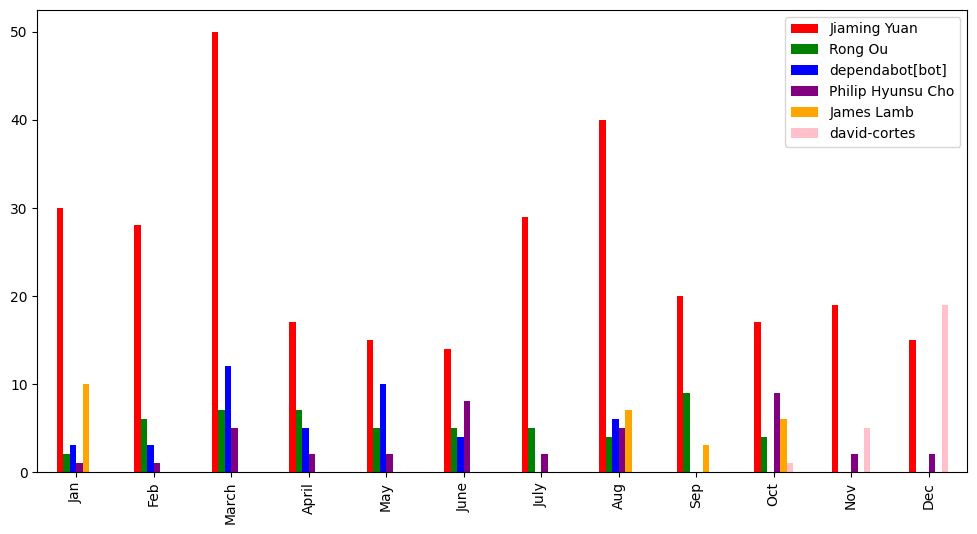

In [144]:
author = pd.DataFrame(df['Author'].value_counts())
author.name = '7 Author that made most of the commits in 2023'
print(author.name)
(author.head(7))
# author.index = range(1,len(author)+1)
author_by_month = pd.DataFrame(commit_through_month.value_counts())
author_by_month.sort_values(by=['count'], ascending=True, inplace=True)
author_by_month.sort_index(inplace=True)

# new.sort_values(by=['commit_month'], ascending=True)
commits_by_month = commits_by_month
commits_by_month['Jiaming Yuan'] = [0 for i in range(12)]
commits_by_month['Rong Ou'] = [0 for i in range(12)]
commits_by_month['dependabot[bot]'] = [0 for i in range(12)]
commits_by_month['Philip Hyunsu Cho'] = [0 for i in range(12)]
commits_by_month['James Lamb'] = [0 for i in range(12)]
commits_by_month['david-cortes'] = [0 for i in range(12)]
i, j, k, m, n, p = 1, 1, 1, 1, 1, 1

for auth in author_by_month.index:
    if (i, 'Jiaming Yuan') == auth and i <= 12:
        commits_by_month.loc[commits_by_month.index[i-1], 'Jiaming Yuan'] += int(author_by_month['count'].loc[auth])
        i += 1
    if (j, 'Rong Ou') == auth and j <= 12:
        commits_by_month.loc[commits_by_month.index[j-1], 'Rong Ou'] += int(author_by_month['count'].loc[auth])
        j += 1
    elif (j, 'Rong Ou') not in author_by_month.index:
        j += 1
    if (k, 'dependabot[bot]') == auth and k <= 12:
        commits_by_month.loc[commits_by_month.index[k-1], 'dependabot[bot]'] += int(author_by_month['count'].loc[auth])
        k += 1
    elif (k, 'dependabot[bot]') not in author_by_month.index:
        k += 1
    if (m, 'Philip Hyunsu Cho') == auth and m <= 12:
        commits_by_month.loc[commits_by_month.index[m-1], 'Philip Hyunsu Cho'] += int(author_by_month['count'].loc[auth])
        m += 1
    elif (m, 'Philip Hyunsu Cho') not in author_by_month.index:
        m += 1
    if (n, 'James Lamb') == auth and n <= 12:
        commits_by_month.loc[commits_by_month.index[n-1], 'James Lamb'] += int(author_by_month['count'].loc[auth])
        n += 1
    elif (n, 'James Lamb') not in author_by_month.index:
        n += 1
    if (p, 'david-cortes') == auth and p <= 12:
        commits_by_month.loc[commits_by_month.index[p-1], 'david-cortes'] += int(author_by_month['count'].loc[auth])
        p +=1
    elif (p, 'david-cortes') not in author_by_month.index:
        p += 1
commits_by_month.drop(['Commits'], axis=1).plot.bar(figsize=(12,6), color=['red','green', 'blue', 'purple', 'orange', 'pink'])
author_by_month